# Q-Learning on Mountain-Cart Environment

In [9]:
import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")

In [2]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))

In [11]:
reward_history = np.zeros((20000, 10))


# LEARNING_RATE = 0.1
# DISCOUNT = 0.95
# EPISODES = 20000
# epsilon = 0
# epsilon = 0.1


In [34]:
exp_no = 0

LEARNING_RATE = 0.1
DISCOUNT = 0.9
EPISODES = 20000
epsilon = 0

START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING-START_EPSILON_DECAYING)


DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

for episode in tqdm(range(EPISODES)):
    episode_reward = 0
    
#     if episode % SHOW_EVERY == 0:
#         print(episode)
#         render = True
#     else:
#         render = False

    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
#         if render:
#             env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1-LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT*max_future_q)
            q_table[discrete_state+(action, )] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    reward_history[episode, exp_no] = episode_reward

env.close()

100%|██████████| 20000/20000 [02:32<00:00, 131.44it/s]


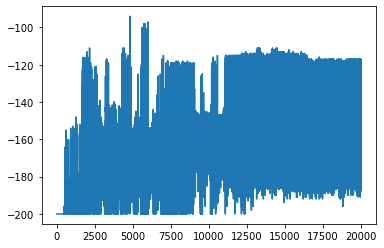

In [35]:
plt.plot(reward_history[:, 0])
plt.show()